# 1. HOG

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

(128, 64, 3)


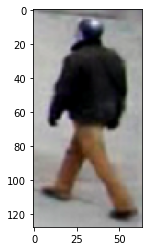

In [27]:
path = './강의 파일/5 실습이미지데이터/'
src = cv2.imread(path + 'man.png')
print(src.shape)
plt.imshow(src)
plt.show()

In [28]:
#1: HoG in color image with default
hog = cv2.HOGDescriptor()
des = hog.compute(src)
print('des.shape=', des.shape)
print('des=', des)

des.shape= (3780, 1)
des= [[0.01308054]
 [0.00584509]
 [0.04909251]
 ...
 [0.04155609]
 [0.02162938]
 [0.08109097]]


In [29]:
#2. parameter customizing
winSize           = (64, 128)
blockSize         = (16, 16)
blockStride       = (8, 8)
cellSize          = (8, 8)  
nbins             = 9
derivAperture     = 1    
winSigma          = -1
histogramNormType = 0
L2HysThreshold    = 0.2
gammaCorrection   = True
nlevels           = 64  
signedGradient    = False

# 자세한 파라미터는 구글링
hog2 = cv2.HOGDescriptor(winSize, blockSize, blockStride, cellSize, nbins, derivAperture, 
                         winSigma, histogramNormType, L2HysThreshold,
                         gammaCorrection, nlevels, signedGradient)

des2 = hog2.compute(src)
print('des2.shape=', des2.shape)
print('des2=', des2)

des2.shape= (3780, 1)
des2= [[0.01308054]
 [0.00584509]
 [0.04909251]
 ...
 [0.04155609]
 [0.02162938]
 [0.08109097]]


In [30]:
#3 HoG in grayscale image
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
des3 = hog.compute(gray)
print('des3.shape=', des3.shape)
print('des3=', des3)
# 값이 조금 바뀌었음

des3.shape= (3780, 1)
des3= [[0.00893402]
 [0.01081526]
 [0.02545157]
 ...
 [0.0347785 ]
 [0.03489022]
 [0.08337955]]


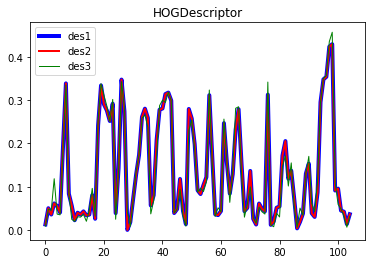

In [31]:
#4 display graph
plt.title('HOGDescriptor')
plt.plot(des[::36], color='b', linewidth=4, label='des1') # 36개씩 샘플링
plt.plot(des2[::36], color='r', linewidth=2, label='des2')
plt.plot(des3[::36], color='g', linewidth=1, label='des3')
plt.legend(loc='best')
plt.show()

# 2. HOG_SVM

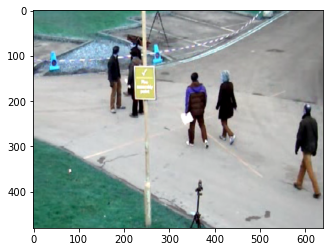

In [32]:
#1
src = cv2.imread(path + 'people.png')
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

plt.imshow(src)
plt.show()

len(loc1)= 0
weights1= ()


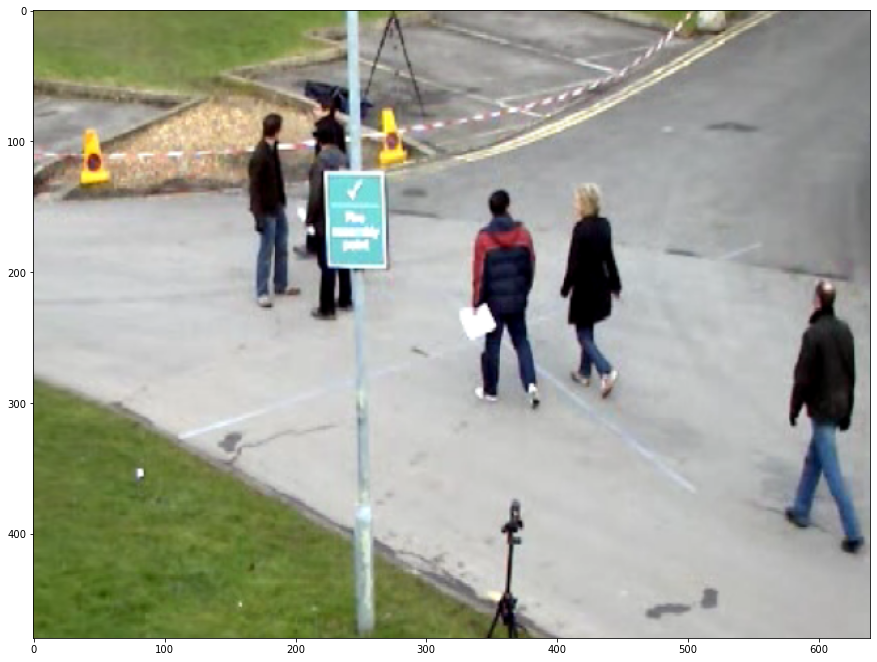

In [15]:
#2
loc1, weights1 = hog.detect(src)
print('len(loc1)=', len(loc1))
print('weights1=', weights1)

dst1 = src.copy()
w, h = hog.winSize
for pt in loc1:
    x, y = pt
    cv2.rectangle(dst, (x, y), (x + w, y + h), (255, 0, 0), 2)
    
dst1_rgb = cv2.cvtColor(dst1, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15, 30))
plt.imshow(dst1_rgb)
plt.show()

len(loc2)= 3
weights2= [[2.22278994]
 [3.51386275]
 [2.27101835]]


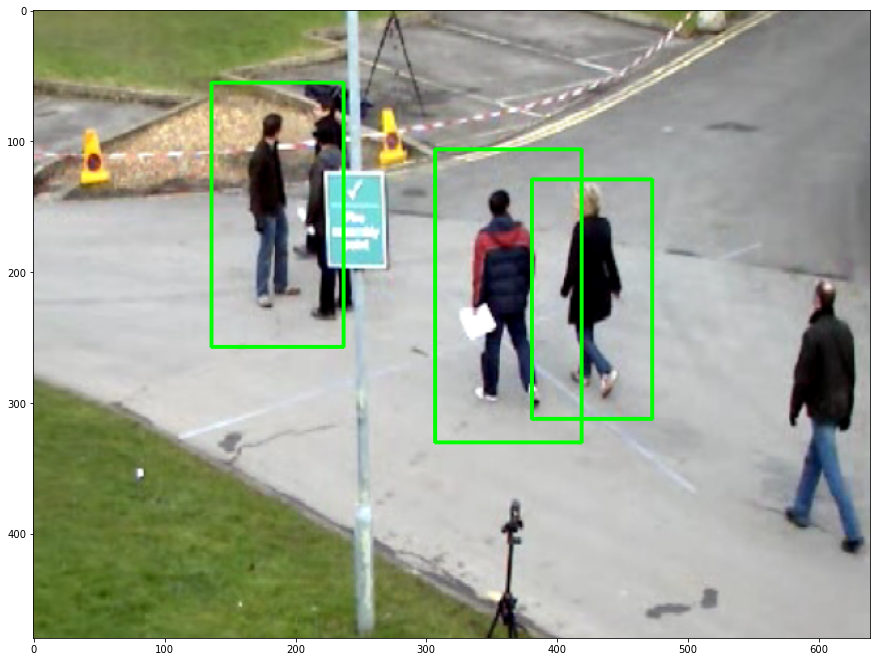

In [33]:
# 3 MultiScale
dst2 = src.copy()
loc2, weights2 = hog.detectMultiScale(src)
print('len(loc2)=', len(loc2))
print('weights2=', weights2)

for rect in loc2:
    x, y, w, h = rect
    cv2.rectangle(dst2, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
dst2_rgb = cv2.cvtColor(dst2, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15, 30))
plt.imshow(dst2_rgb)
plt.show()
# 몇 명은 검출

len(loc2)= 6
weights2= [[2.4992378 ]
 [3.82788089]
 [2.40610977]
 [1.13816943]
 [0.64257275]
 [0.37325626]]


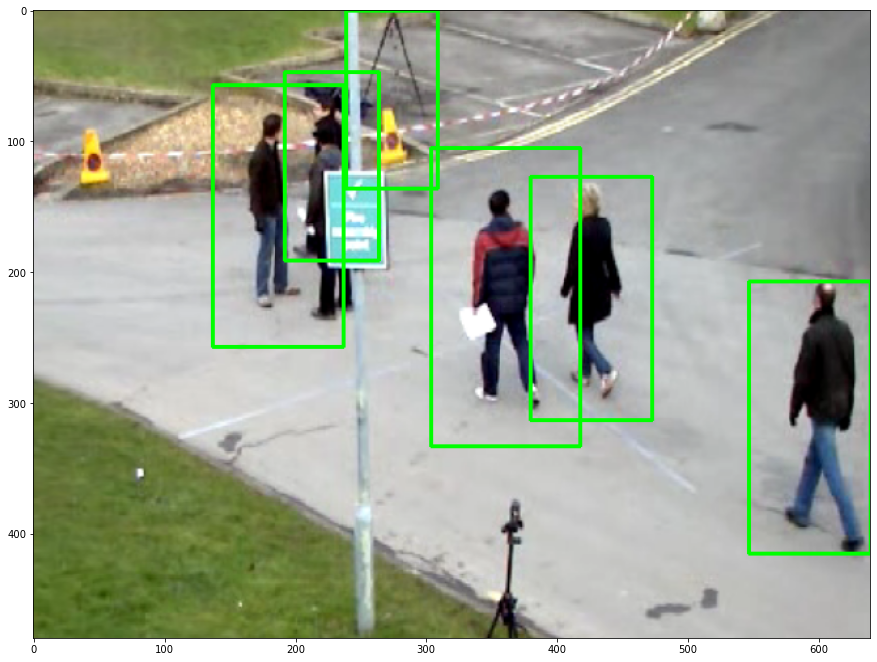

In [34]:
# 4 Multi Scale with Stride, padding option
dst2 = src.copy()
loc2, weights2 = hog.detectMultiScale(src, winStride=(1,1), padding=(8,8)) 
print('len(loc2)=', len(loc2))
print('weights2=', weights2)

for rect in loc2:
    x, y, w, h = rect
    cv2.rectangle(dst2, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
dst2_rgb = cv2.cvtColor(dst2, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15, 30))
plt.imshow(dst2_rgb)
plt.show()
# 몇 명은 검출

len(loc3)= 6
weights3= [[2.4992378 ]
 [3.82788089]
 [2.40610977]
 [1.13816943]
 [0.64257275]
 [0.37325626]]


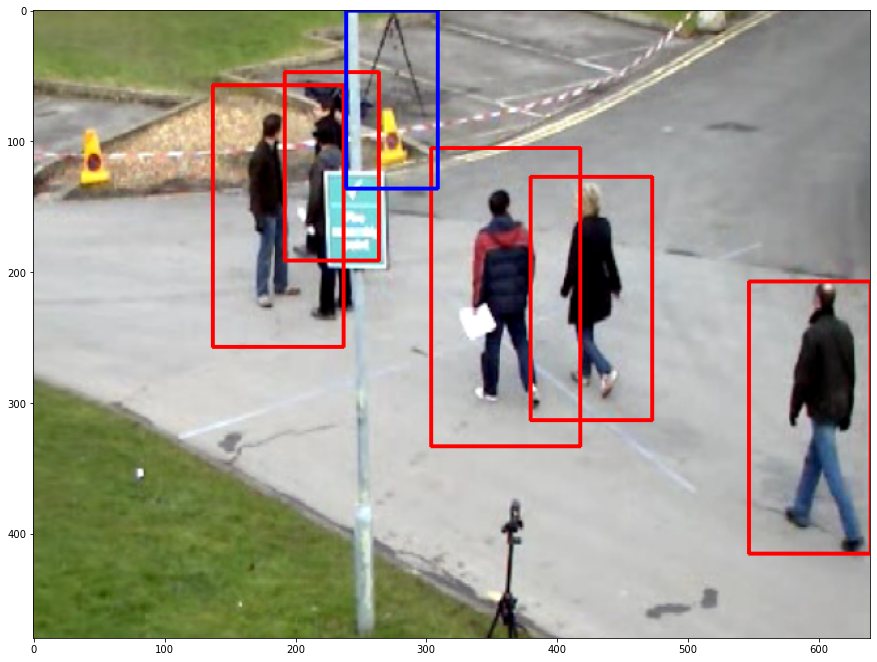

In [35]:
# 5 weight(신뢰도)로 확률값 낮은 것 제거
dst3 = src.copy()
loc3, weights3 = hog.detectMultiScale(src, winStride=(1,1), padding=(8,8))
print('len(loc3)=', len(loc3))
print('weights3=', weights3)

for i, rect in enumerate(loc3):
    x, y, w, h = rect
    if weights3[i] > 0.5:
        cv2.rectangle(dst3, (x, y), (x + w, y + h), (0, 0, 255), 2)
    else:
        cv2.rectangle(dst3, (x, y), (x + w, y + h), (255, 0, 0), 2)
    
dst3_rgb = cv2.cvtColor(dst3, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15, 30))
plt.imshow(dst3_rgb)
plt.show()